In [1]:
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

In [2]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [3]:
import warnings
warnings.simplefilter('ignore')

/home/james/src/lda2vec/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Reading in the saved model topics

After runnning `lda2vec_run.py`, a `topics.pyldavis.npz` will be created that contains the topic-to-word probabilities and frequencies. What's left is to visualize and label each topic from the it's prevalent words.

In [4]:
npz = np.load(open('training_files_pretrained/topics.pyldavis.npz', 'rb'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()

In [5]:
dat.keys()

dict_keys(['topic_term_dists', 'doc_topic_dists', 'doc_lengths', 'vocab', 'term_frequency'])

In [6]:
dat['topic_term_dists']

array([[3.8505293e-10, 2.5126532e-01, 1.4045586e-02, ..., 2.3058003e-04,
        4.4142778e-04, 1.3721366e-04],
       [1.9909951e-10, 3.0404621e-01, 1.0539317e-02, ..., 1.4621842e-04,
        5.7821651e-04, 9.3247581e-05],
       [4.0214804e-10, 4.8324551e-02, 1.0726486e-02, ..., 3.3764134e-04,
        6.6078600e-04, 7.2439521e-04],
       ...,
       [9.4473152e-11, 4.1324067e-01, 8.3428361e-03, ..., 1.4063310e-04,
        3.4230095e-04, 3.7229896e-05],
       [3.2997211e-10, 3.7262451e-02, 2.2880951e-02, ..., 3.9220607e-04,
        3.8037304e-04, 1.3337515e-03],
       [1.9068133e-10, 4.1609023e-02, 8.2619246e-03, ..., 3.1089180e-04,
        4.3960125e-04, 6.7472126e-04]], dtype=float32)

In [7]:
dat['topic_term_dists'].shape

(20, 1637)

In [8]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 out_of_vocabulary <SKIP> in a apartment . this interested see available
Topic 1 out_of_vocabulary <SKIP> in a looking . interested 2 for -
Topic 2 out_of_vocabulary <SKIP> the  a i that for . and
Topic 3 out_of_vocabulary <SKIP> to . i a my at the in
Topic 4 out_of_vocabulary <SKIP> in . a - / for the ,
Topic 5 out_of_vocabulary <SKIP> in available interested ? a apartment units or
Topic 6 out_of_vocabulary <SKIP>  the rent months ?  is that
Topic 7 out_of_vocabulary <SKIP> in ? a - any or are .
Topic 8 out_of_vocabulary <SKIP> see this in apartment . interested a available
Topic 9 out_of_vocabulary <SKIP> the  a that . for i to
Topic 10 out_of_vocabulary <SKIP>  transfer bank using the spectrum stubs proof
Topic 11 out_of_vocabulary <SKIP>  transfer spectrum the bank using jetty confused
Topic 12 out_of_vocabulary <SKIP>  the that . for  to a
Topic 13 out_of_vocabulary <SKIP> to i . the a but my for
Topic 14 out_of_vocabulary <SKIP> interested abodo in viewing this apartment s

### Visualize topics

In [9]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [10]:
pyLDAvis.display(prepared_data)

Here's a summary.

Topic 1
Summary: Searching, optimistic, flexible

1. "Hi, can you please tell me a little more about this apartment. I’m looking to moving in with others and we have a dog and a cat. ..."
2. "I’m looking for 1 bed apartment with nov 1st move in. Will there be any availability around that time?"

Top words
1. Looking
2. Ideally
3. Move
4. Flexible
5. Spacious
6. Currently
7. Preference
8. Pets

Topic 2
Summary: Pandemic, employment uncertainty, anxiety

1. "Do I need to fill out any health forms prior to the open house tonight?"
2. "Hey! So, my roommate and I aren't moving till probably August due to all the COVID stuff going on ..."
3. "...about 95% of my friends and family have left NYC due to covid and loss of job so I’m looking for a sense of community within a building like this ..."
4. "Most important is my space since working from home is the new normal until mid 2021 for my company ..."
5. "... Just a little particular at this moment because of the new normal."

Top words
1. Medical
2. Job
3. Pandemic
4. Employment
5. Recently
6. But

Topic 3
Summary: Extra costs - how much more do i have to pay for shit?

1. "Are utilities included in the rent? ..."
2. "Also how much is the application fee and where can I fill it out and submit it with payment? ..."
3. "I'm currently locked out of my online banking account and can't get bank statements for proof of income. ..."

Top words
1. Pay
2. Charged
3. Security
4. Utility
5. Deposit
6. Fee
7. Rent

Topic 4
Summary: maybe section 8 related

Top words
1. Social
2. Old
3. Landlord
4. York

Topic 5
Summary: reschedule/cancel

Top words
1. Reschedule
2. Cancel
3. Sorry
4. Unable
5. Another

Topic 6
Summary: Concessions, deals, extra features, square footage

Top words
1. ?
2. Available
3. Video
4. Renovated
5. Furnished
6. Footage
7. Promotional
8. Concessions

Topic 7
Summary: Most affordable apartments

Top words
1. Curious
2. Cheapest
3. Affordable
4. Rent
5. Promotional
6. Pricing

Topic 8
Summary: Financial documents related to applying

Top words
1. Pay
2. Statements
3. Unemployment
4. Stubs
5. Discussed
6. Portal
7. Prorated

Topic 9
Summary: More application stuff

Top words
1. Application
2. Account
3. Error
4. Portal
5. Order
6. Documents
7. Electricity
8. Proceed
9. Insurance

Topic 10
Summary: Amenities and utilities plus associated costs

Top words
1. Included
2. Utilities
3. Renovated
4. Amenity
5. Washer
6. Monthly
7. Parking
8. Flooring
9. Covered
10. Cost

Topic 11
Summary: Amenity, Costs, etc

Topic 12
Summary: More application stuff bleeding into resident - paperwork

Top words
1. Keys
2. Account
3. Stubs
4. Money
5. Letter
6. Energy
7. Insurance
8. Switch
9. Forms

Topic 13
Summary: another reschedule/cancel topic, but maybe more urgent

Topic 14
Summary: schedule tour, maybe within context of specific unit or building

Top words
1. Viewing
2. Street
3. Client
4. Listing
5. Available
6. Please
7. Possible
8. Interested

Others:
1. 54th
2. Atlantic
3. Washington
4. 550
5. Kent
6. #
7. 646

Topic 15
Summary: schedule tour for specific date/time

Top words
1. Viewing
2. Schedule
3. Possible

Others:
1. 1:30
2. 11:30
3. 10:30
4. 2:30
5. Sat
6. Evening
7. Weekend

Topic 16
Summary: maybe resident/application payments

Top words
1. Liability
2. Prorated
3. Charged
4. Portal
5. Payment
6. Package
7. Pay

Topic 17
Summary: another schedule tour?

Top words
1. Viewing
2. Tomorrow
3. Possible
4. Seeing
5. See

Topic 18
Summary: Another schedule/interested

Topic 19
Summary: Apartment options and rent

Top words
1. Under
2. Units
3. More
4. Bedroom
5. Interested
6. Similiar

Others
1. 1,300
2. 1,200
3. 2500
4. 1700

Topic 20
Summary: Combo of schedule, apartment search

### Individual document topics

In [55]:
import pandas as pd
texts = pd.read_csv('../data/messages_100k.csv')['message']

In [56]:
texts.head()

0    Is the offer still available of 6 weeks free a...
1    Hi \n\nIs the b1 floor plan the knowles plan a...
2    Yes! I need to get my fathers approval. I just...
3    Looking for a studio / 1bed <$2,400, currently...
4    Hi there I’m interested in a studio\nIf I able...
Name: message, dtype: object

In [51]:
dominant_doc_topics = np.argmax(dat['doc_topic_dists'], axis=1)

In [106]:
num_messages_to_show = 1

topic_texts = {}
for i in range(len(dat['topic_term_dists'])):
    topic_texts[i] = texts[dominant_doc_topics == i]
    # prob = dat['doc_topic_dists'][dominant_doc_topics == i][:,i]
    # idx = np.argsort(prob)[::-1]
    print(f"Messages for topic {i + 1}:")
    for j in range(num_messages_to_show):
        print(f"{topic_texts[i].iloc[j]}\n=====\n")
    print("=====")

Messages for topic 1:
Hi, can you please tell me a little more about this apartment. I’m looking to moving in with others and we have a dog and a cat. The dog is a Rottweiler mix. Please let me know! Thank you!
=====

=====
Messages for topic 2:
Dear leasing Officer,

My name is Dibash Sapkota. I am looking for 1bedroom apartment for me and
my wife starting from 11th April. I was in the leasing office this
afternoon but seems like you guys are closed. It would be great if I could
get further information about availability and rent. Also I was wondering
if you can arrange time for me to have the tour of the unit so I could
decide on moving ASAP. One of my friend (current resident of your
apartment) referred you to me.

Looking forward to hearing from you.
=====

=====
Messages for topic 3:
Hello I tried to make a appointment thru the link you sent and it says
there are no available appointments
=====

=====
Messages for topic 4:
Hi, I'm Kari. I am interested in Unit 22-111 or units with

#### First Example

In [32]:
print(texts[0])

Is the offer still available of 6 weeks free and 5% off?


In [49]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][0]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

99% in topic 10 which has top words the, , , rent, how, have, what, do, that, ?


<BarContainer object of 20 artists>

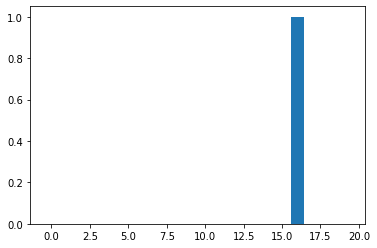

In [50]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

#### Second Example

In [43]:
print(texts[3])

Looking for a studio / 1bed <$2,400, currently located in Nob Hill and open to different neighborhoods in the city (minus downtown / tenderloin, maybe soma) . Thanks!


In [44]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][3]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

99% in topic 06 which has top words in, looking, ., and, for, a, the, move, , ,


<BarContainer object of 20 artists>

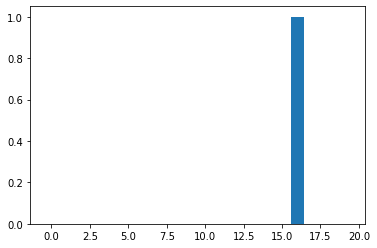

In [45]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])